In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import multiprocessing

In [2]:
def try_formats(date):
    for fmt in ('%m/%d/%Y', '%m-%d-%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT


df = pd.read_csv("gingers.csv")
df2 = pd.read_csv("climate.csv")

df.dropna(subset=['Date'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.resample('D').asfreq()
df = df.interpolate(method='linear')

df2['Date'] = df2['Date'].apply(try_formats)
df2.dropna(subset=['Date'], inplace=True)  # Drop rows with NaT in 'Date'

df2.set_index('Date', inplace=True)
df2 = df2.resample('D').asfreq()
df2 = df2.interpolate(method='linear')

time = np.arange(len(df), dtype="float32")
series=df["Average"]
df.head(20)
df2.head(20)


,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-16,Kathmandu,27.7,85.3,16.14,83.59,14.48,80.94,20.30,16.49,23.48,...,6.11,20.82,1.83,3.59,0.61,2.98,2.19,3.80,0.95,2.85
2013-06-17,Kathmandu,27.7,85.3,46.09,83.51,14.37,77.76,20.82,16.28,25.46,...,8.63,21.43,1.62,2.98,0.67,2.31,1.77,2.55,1.06,1.48
2013-06-18,Kathmandu,27.7,85.3,5.66,83.35,14.48,76.65,21.13,16.42,25.73,...,8.47,21.83,1.60,3.70,0.14,3.56,1.55,3.11,0.24,2.87
2013-06-19,Kathmandu,27.7,85.3,5.39,83.34,14.95,80.68,20.81,17.00,24.81,...,7.30,22.06,2.16,4.26,0.58,3.68,2.21,3.50,0.81,2.69
2013-06-20,Kathmandu,27.7,85.3,2.84,83.32,15.33,82.41,20.87,17.44,25.37,...,8.92,22.29,2.36,4.62,0.42,4.21,2.30,4.02,0.47,3.56
2013-06-21,Kathmandu,27.7,85.3,23.06,83.30,16.13,85.70,21.05,18.26,24.87,...,6.97,21.93,2.07,4.32,0.18,4.14,1.93,3.74,0.28,3.46
2013-06-22,Kathmandu,27.7,85.3,13.89,83.38,16.16,83.09,21.61,18.21,25.41,...,6.80,22.45,1.83,3.74,0.33,3.41,1.79,2.98,0.44,2.54
2013-06-23,Kathmandu,27.7,85.3,29.78,83.30,16.35,82.32,21.93,18.35,25.83,...,6.77,22.53,1.79,3.90,0.23,3.67,1.77,3.26,0.21,3.05
2013-06-24,Kathmandu,27.7,85.3,3.55,83.37,15.99,80.84,21.88,18.02,25.75,...,7.13,22.76,2.05,3.86,0.04,3.82,2.04,3.31,0.14,3.17


In [3]:
print(series)

Date
2013-06-16    145.0
2013-06-17    145.0
2013-06-18    145.0
2013-06-19    145.0
2013-06-20    145.0
              ...  
2019-12-27    115.0
2019-12-28    115.0
2019-12-29    115.0
2019-12-30    115.0
2019-12-31    115.0
Freq: D, Name: Average, Length: 2390, dtype: float64


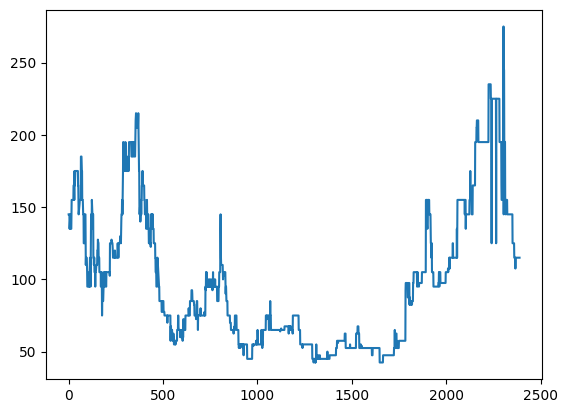

In [4]:
plt.plot(time,series)
plt.show()

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


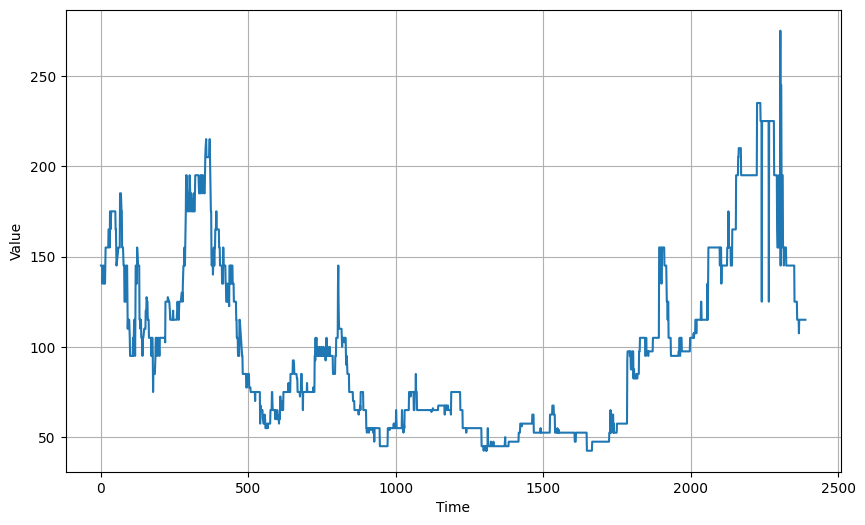

In [6]:
plot_series(time, series)

In [7]:
# Define the split time
split_time = 2000

# Get the train set
time_train = time[:split_time]
x1_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x1_valid = series[split_time:]

In [8]:
# Parameters
window_size = 20
batch_size = 2
shuffle_buffer_size = 2500

In [9]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [10]:
dataset = windowed_dataset(x1_train, window_size, batch_size, shuffle_buffer_size)

In [11]:
# Print shapes of feature and label
for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (2, 20)
shape of label: (2,)


In [12]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series 
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In [13]:
# Build the model
model_simplernn = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(25, return_sequences=True,activation="ReLU"),
  tf.keras.layers.SimpleRNN(15,activation="ReLU"),
  tf.keras.layers.Dense(1,activation="linear"),
])

# Set the optimizer

# Set the training parameters
model_simplernn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError(),
              metrics=["mse"])

# Train the model
history = model_simplernn.fit(dataset,epochs=10)

Epoch 1/10
990/990 [==============================] - 21s 18ms/step - loss: 1305.1135 - mse: 1305.1135
Epoch 2/10
990/990 [==============================] - 17s 17ms/step - loss: 45.3356 - mse: 45.3356
Epoch 3/10
990/990 [==============================] - 15s 15ms/step - loss: 42.0359 - mse: 42.0359
Epoch 4/10
990/990 [==============================] - 17s 17ms/step - loss: 37.5195 - mse: 37.5195
Epoch 5/10
990/990 [==============================] - 18s 17ms/step - loss: 33.4705 - mse: 33.4705
Epoch 6/10
990/990 [==============================] - 17s 17ms/step - loss: 29.9728 - mse: 29.9728
Epoch 7/10
990/990 [==============================] - 18s 17ms/step - loss: 27.2960 - mse: 27.2960
Epoch 8/10
990/990 [==============================] - 17s 17ms/step - loss: 24.7874 - mse: 24.7874
Epoch 9/10
990/990 [==============================] - 18s 17ms/step - loss: 21.7967 - mse: 21.7967
Epoch 10/10
990/990 [==============================] - 17s 17ms/step - loss: 20.8554 - mse: 20.8554


2389
1185/1185 [==============================] - 8s 6ms/step
2370 2370 2370


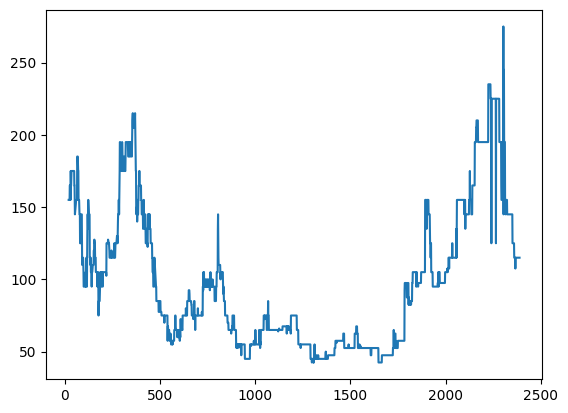

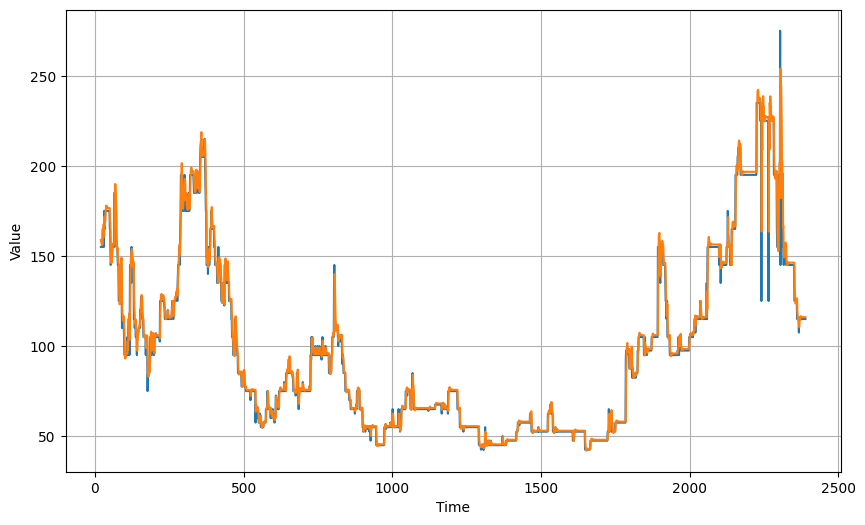

In [14]:
forecast_series = series[:-1]
print(len(forecast_series))
forecast = model_forecast(model_simplernn, forecast_series, window_size, batch_size)
results = forecast.squeeze()
print(series[window_size:].shape[0],results.shape[0],time[window_size:].shape[0])
plt.plot(time[window_size:],series[window_size:])
plt.show()
plot_series(time[window_size:], (series[window_size:], results))

195/195 [==============================] - 1s 6ms/step


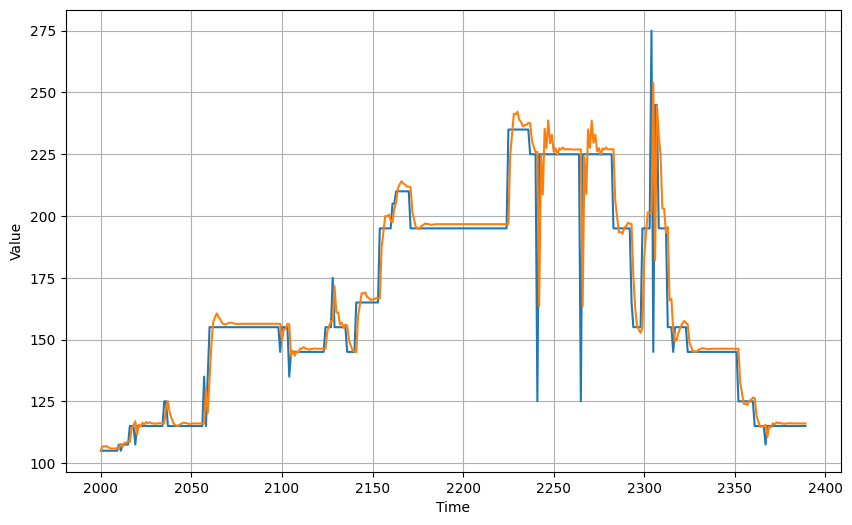

In [15]:
forecast_series = series[split_time - window_size:-1]
forecast = model_forecast(model_simplernn, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x1_valid, results))

In [16]:
# Build the model
model_gru = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.GRU(25, return_sequences=True,activation="ReLU"),
  tf.keras.layers.GRU(15,activation="ReLU"),
  tf.keras.layers.Dense(1,activation="linear"),
])

# Set the optimizer

# Set the training parameters
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError(),
              metrics=["mse"])

# Train the model
history = model_gru.fit(dataset,epochs=10)

Epoch 1/10
990/990 [==============================] - 39s 31ms/step - loss: 4155.4443 - mse: 4155.4443
Epoch 2/10
990/990 [==============================] - 23s 23ms/step - loss: 54.8113 - mse: 54.8113
Epoch 3/10
990/990 [==============================] - 480s 485ms/step - loss: 28.8240 - mse: 28.8240
Epoch 4/10
990/990 [==============================] - 26s 26ms/step - loss: 24.0885 - mse: 24.0885
Epoch 5/10
990/990 [==============================] - 29s 29ms/step - loss: 22.6684 - mse: 22.6684
Epoch 6/10
990/990 [==============================] - 28s 28ms/step - loss: 21.4649 - mse: 21.4649
Epoch 7/10
990/990 [==============================] - 29s 28ms/step - loss: 21.0388 - mse: 21.0388
Epoch 8/10
990/990 [==============================] - 29s 29ms/step - loss: 20.9353 - mse: 20.9353
Epoch 9/10
990/990 [==============================] - 28s 28ms/step - loss: 20.3598 - mse: 20.3598
Epoch 10/10
990/990 [==============================] - 27s 27ms/step - loss: 19.9849 - mse: 19.9849


2389
1185/1185 [==============================] - 9s 7ms/step
2370 2370 2370


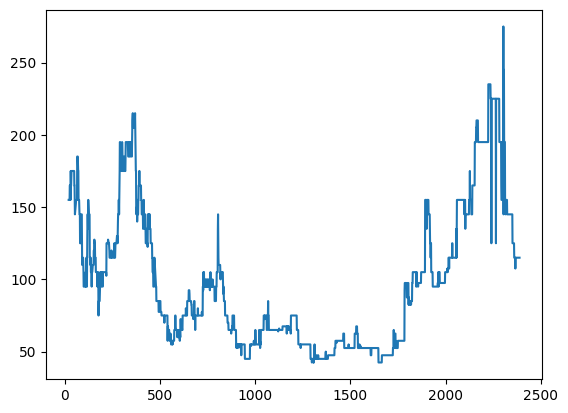

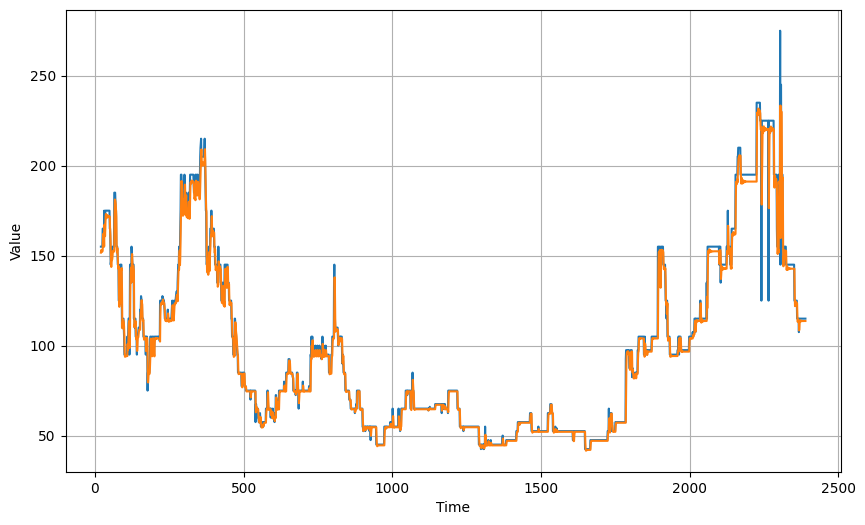

In [17]:
forecast_series = series[:-1]
print(len(forecast_series))
forecast = model_forecast(model_gru, forecast_series, window_size, batch_size)
results = forecast.squeeze()
print(series[window_size:].shape[0],results.shape[0],time[window_size:].shape[0])
plt.plot(time[window_size:],series[window_size:])
plt.show()
plot_series(time[window_size:], (series[window_size:], results))

195/195 [==============================] - 1s 7ms/step


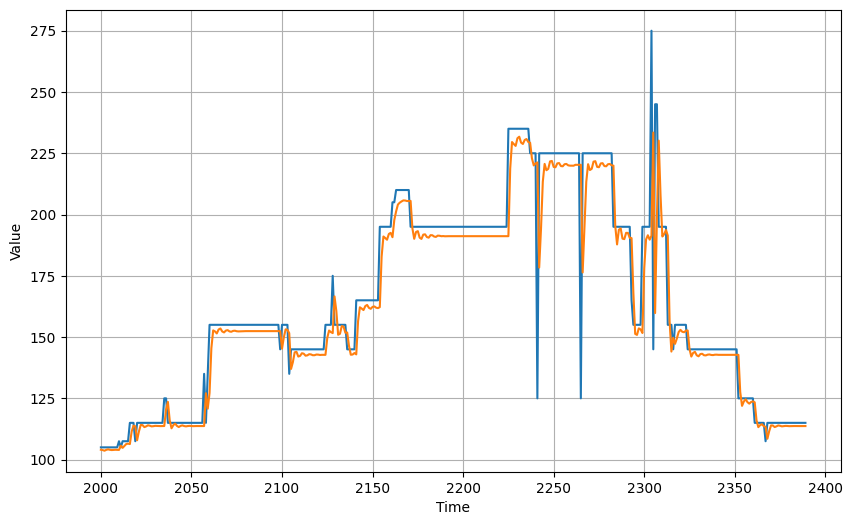

In [18]:
forecast_series = series[split_time - window_size:-1]
forecast = model_forecast(model_gru, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x1_valid, results))

In [22]:
# Build the model
model_lstm = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.LSTM(25, return_sequences=True,activation="ReLU"),
  tf.keras.layers.LSTM(15,activation="ReLU"),
  tf.keras.layers.Dense(1,activation="ReLU"),
])

# Set the optimizer

# Set the training parameters
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError(),
              metrics=["mse"])

# Train the model
history = model_lstm.fit(dataset,epochs=10)

Epoch 1/10
990/990 [==============================] - 34s 26ms/step - loss: 972.4993 - mse: 972.4993
Epoch 2/10
990/990 [==============================] - 26s 26ms/step - loss: 162.5744 - mse: 162.5744
Epoch 3/10
990/990 [==============================] - 25s 24ms/step - loss: 110.8687 - mse: 110.8687
Epoch 4/10
990/990 [==============================] - 25s 25ms/step - loss: 79.7802 - mse: 79.7802
Epoch 5/10
990/990 [==============================] - 26s 25ms/step - loss: 240.1133 - mse: 240.1133
Epoch 6/10
990/990 [==============================] - 27s 27ms/step - loss: 60.4970 - mse: 60.4970
Epoch 7/10
990/990 [==============================] - 27s 27ms/step - loss: 132.6856 - mse: 132.6856
Epoch 8/10
990/990 [==============================] - 26s 25ms/step - loss: 251.6228 - mse: 251.6228
Epoch 9/10
990/990 [==============================] - 28s 27ms/step - loss: 116.7090 - mse: 116.7090
Epoch 10/10
990/990 [==============================] - 26s 26ms/step - loss: 57.8688 - mse: 57.

2389
1185/1185 [==============================] - 10s 7ms/step
2370 2370 2370


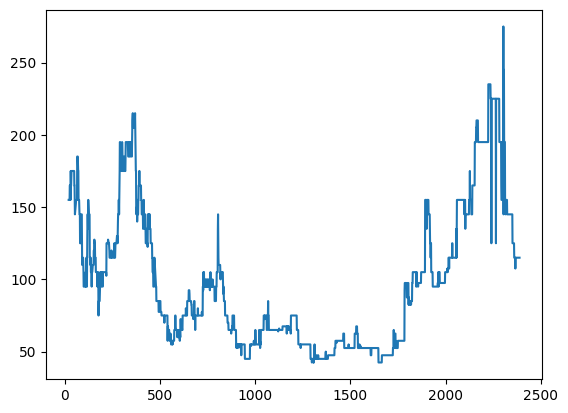

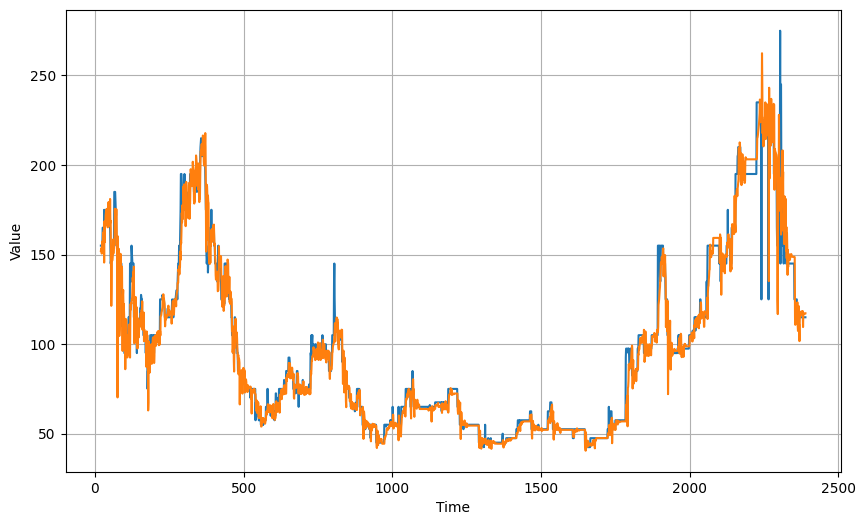

In [23]:
forecast_series = series[:-1]
print(len(forecast_series))
forecast = model_forecast(model_lstm, forecast_series, window_size, batch_size)
results = forecast.squeeze()
print(series[window_size:].shape[0],results.shape[0],time[window_size:].shape[0])
plt.plot(time[window_size:],series[window_size:])
plt.show()
plot_series(time[window_size:], (series[window_size:], results))

195/195 [==============================] - 1s 7ms/step


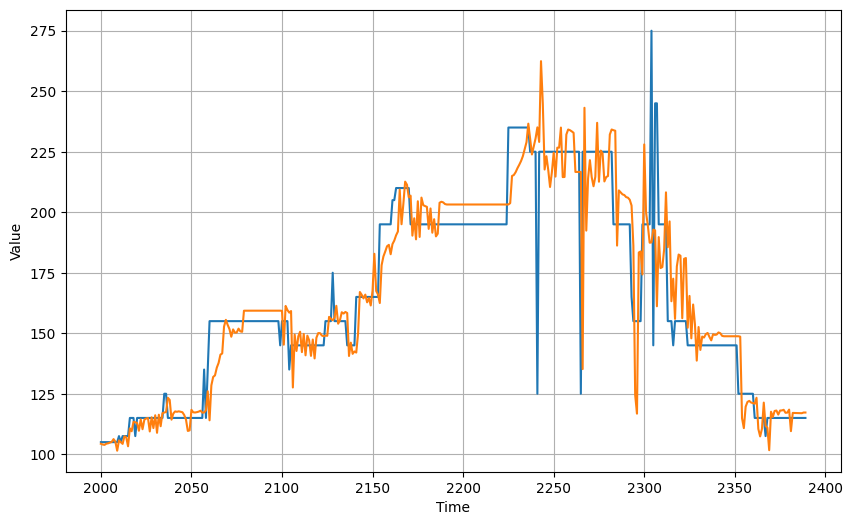

In [24]:
forecast_series = series[split_time - window_size:-1]
forecast = model_forecast(model_lstm, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x1_valid, results))